In [1]:
import numpy as np
import matplotlib.pyplot as plt
from nbody import Particles, NBodySimulator
from nbody import load_files, save_movie
from numba import jit, njit, prange, set_num_threads

In [2]:
# Set the number of threads to use for numba
nthreads =10
set_num_threads(nthreads)

In [3]:
#第一題
# 參數設定
time= 0    # the starting  time
num_particles =100  # 粒子數量

particles = Particles(N=num_particles)
mean = 0   # normal distribution的平均值
variance = 1  #  normal distribution 的變異數
total_mass = 20  # 系統的總質量
dt=0.01

# 生成位置、速度和加速度(normal distribution)
positions = np.random.normal(mean, np.sqrt(variance), (num_particles, 3))
velocities= np.random.normal(mean, np.sqrt(variance), (num_particles, 3))
accelerations = np.random.normal(mean, np.sqrt(variance), (num_particles, 3))
# 假設每個粒子質量相同
masses = np.ones((num_particles, 1)) * (total_mass /num_particles)
tags = np.linspace(1,num_particles,num_particles)





In [4]:
# 開始模擬
particles.positions =positions
particles.velocities=velocities
particles.accelerations =accelerations
# 假設每個粒子質量相同
particles.masses = masses
particles.tags = tags

simulation = NBodySimulator(particles)
simulation.setup(G=0.1, rsoft=0.01, method='RK4', io_freq=200) #設定每跑2秒輸出一個dat檔 
simulation.evolve(dt=0.01, tmax=10+dt) #我tmax加一個dt是因為我發現我如果直接跑10的話最後10秒的圖的n不知道為什麼會改變，所以我加dt

fns = load_files('nbody')
print(fns)#確認有輸出哪些資料


n= 0 Time:  0.0  dt:  0.01
n= 200 Time:  2.0000000000000013  dt:  0.01
n= 400 Time:  3.9999999999999587  dt:  0.01
n= 600 Time:  5.9999999999999165  dt:  0.01
n= 800 Time:  7.999999999999874  dt:  0.01
n= 1000 Time:  9.999999999999831  dt:  0.01
Simulation is done!
['data_nbody\\nbody_000000.dat', 'data_nbody\\nbody_000200.dat', 'data_nbody\\nbody_000400.dat', 'data_nbody\\nbody_000600.dat', 'data_nbody\\nbody_000800.dat', 'data_nbody\\nbody_001000.dat']


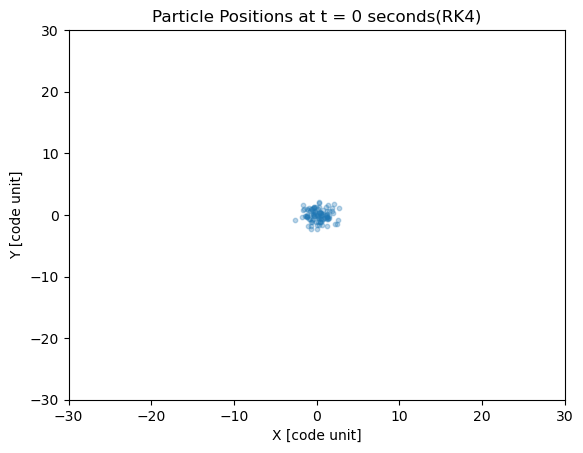

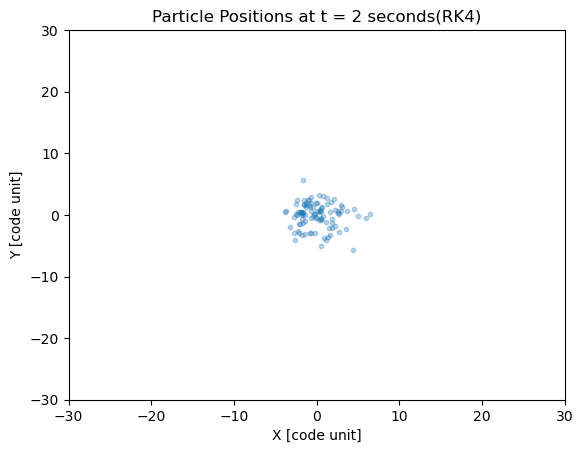

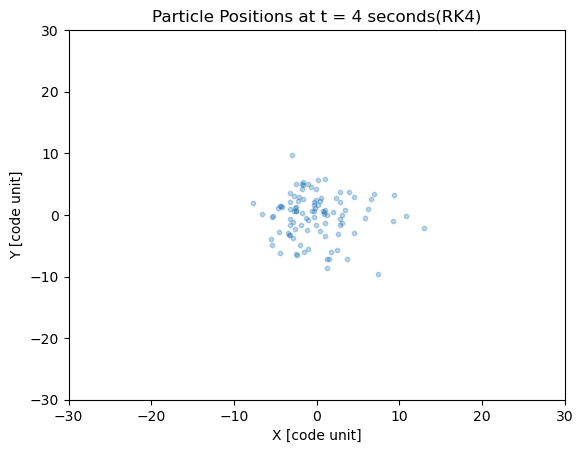

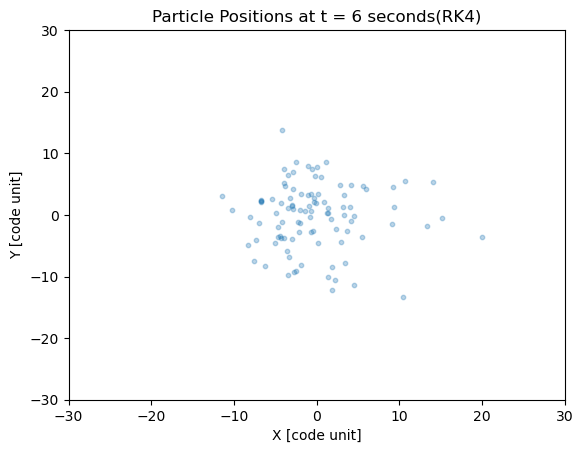

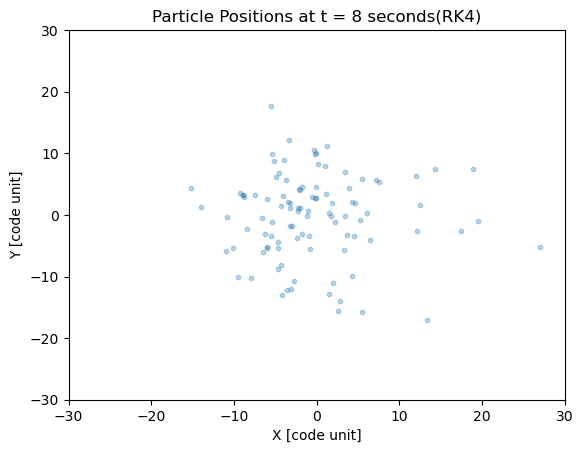

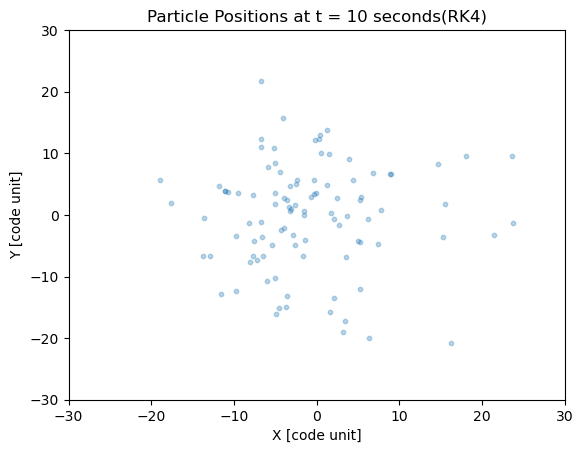

In [5]:
#開始繪圖
#建立輸出檔的路徑
file_paths = [
    'data_nbody\\nbody_000000.dat',
    'data_nbody\\nbody_000200.dat',
    'data_nbody\\nbody_000400.dat',
    'data_nbody\\nbody_000600.dat',
    'data_nbody\\nbody_000800.dat',
    'data_nbody\\nbody_001000.dat'
]
#讀每個輸出檔，畫出位置散佈圖
for idx, file_path in enumerate(file_paths):
    # 讀檔案
    data = np.loadtxt(file_path)
    # 抓出每個粒子x、y的位置
    positions_x = data[2, :]
    positions_y = data[3, :]
 
    # 畫圖
    plt.scatter(positions_x, positions_y, alpha=0.3, s=10) #alpha 調整透明度 s調整點的大小
    plt.xlabel('X [code unit]')
    plt.ylabel('Y [code unit]')
    plt.xlim(-30, 30) 
    plt.ylim(-30, 30) 
    plt.title(f'Particle Positions at t = {2*idx} seconds(RK4)')  
    plt.show()
    
    
    


n= 0 Time:  0.0  dt:  0.01
n= 200 Time:  2.0000000000000013  dt:  0.01
n= 400 Time:  3.9999999999999587  dt:  0.01
n= 600 Time:  5.9999999999999165  dt:  0.01
n= 800 Time:  7.999999999999874  dt:  0.01
n= 1000 Time:  9.999999999999831  dt:  0.01
Simulation is done!
['data_nbody\\nbody_000000.dat', 'data_nbody\\nbody_000200.dat', 'data_nbody\\nbody_000400.dat', 'data_nbody\\nbody_000600.dat', 'data_nbody\\nbody_000800.dat', 'data_nbody\\nbody_001000.dat']


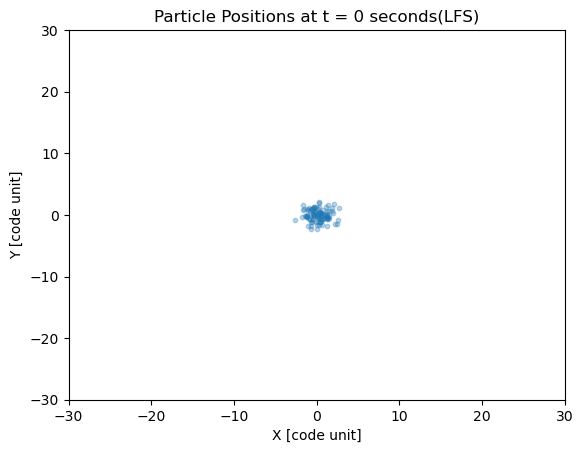

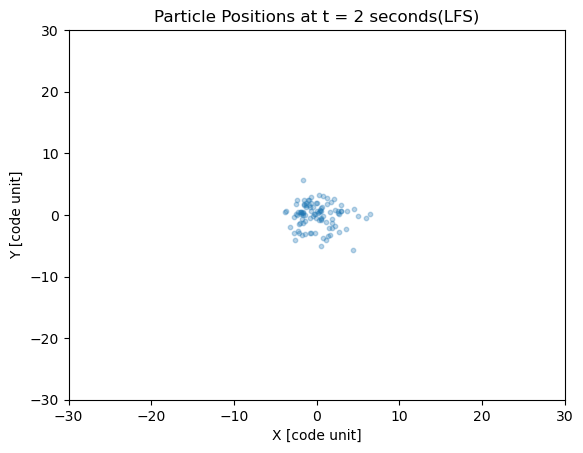

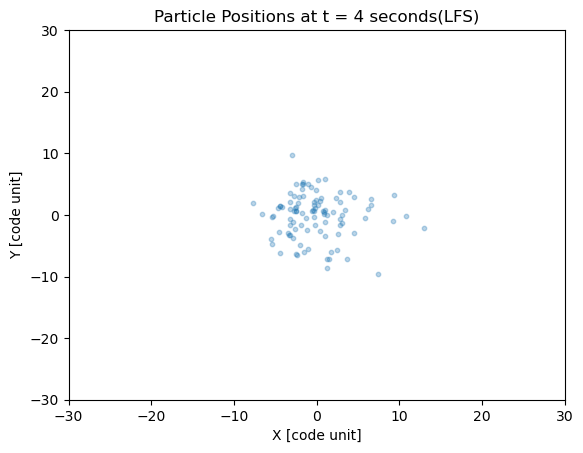

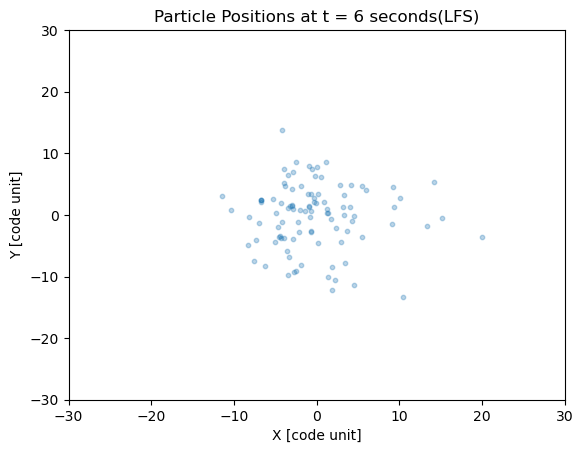

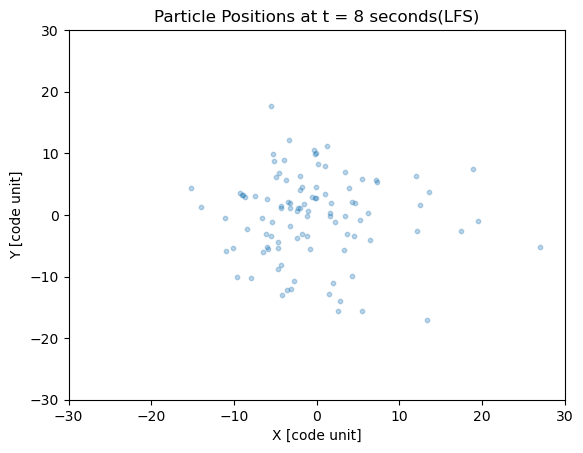

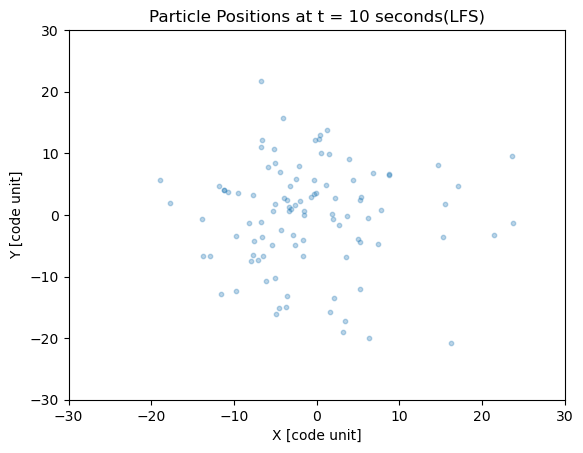

In [6]:
#第二題
#數據調回初始條件
particles.positions =positions
particles.velocities=velocities
particles.accelerations =accelerations
particles.masses = masses
particles.tags = tags
simulation = NBodySimulator(particles)
simulation.setup(G=0.1, rsoft=0.01, method='LFS', io_freq=200) #設定每跑2秒輸出一個dat檔 
simulation.evolve(dt=0.01, tmax=10+dt) #我tmax加一個dt是因為我發現我如果直接跑10的話最後10秒的圖的n不知道為什麼會改變，所以我加dt

fns = load_files('nbody')
print(fns)#確認有輸出哪些資料
#開始繪圖
#建立輸出檔的路徑
file_paths = [
    'data_nbody\\nbody_000000.dat',
    'data_nbody\\nbody_000200.dat',
    'data_nbody\\nbody_000400.dat',
    'data_nbody\\nbody_000600.dat',
    'data_nbody\\nbody_000800.dat',
    'data_nbody\\nbody_001000.dat'
]
#讀每個輸出檔，畫出位置散佈圖
for idx, file_path in enumerate(file_paths):
    # 讀檔案
    data = np.loadtxt(file_path)
    # 抓出每個粒子x、y的位置
    positions_x = data[2, :]
    positions_y = data[3, :]
 
    # 畫圖
    plt.scatter(positions_x, positions_y, alpha=0.3, s=10) #alpha 調整透明度 s調整點的大小
    plt.xlabel('X [code unit]')
    plt.ylabel('Y [code unit]')
    plt.xlim(-30, 30) 
    plt.ylim(-30, 30) 
    plt.title(f'Particle Positions at t = {2*idx} seconds(LFS)')  
    plt.show()
   
        

n= 0 Time:  0.0  dt:  0.01
n= 200 Time:  2.0000000000000013  dt:  0.01
n= 400 Time:  3.9999999999999587  dt:  0.01
n= 600 Time:  5.9999999999999165  dt:  0.01
n= 800 Time:  7.999999999999874  dt:  0.01
n= 1000 Time:  9.999999999999831  dt:  0.01
Simulation is done!


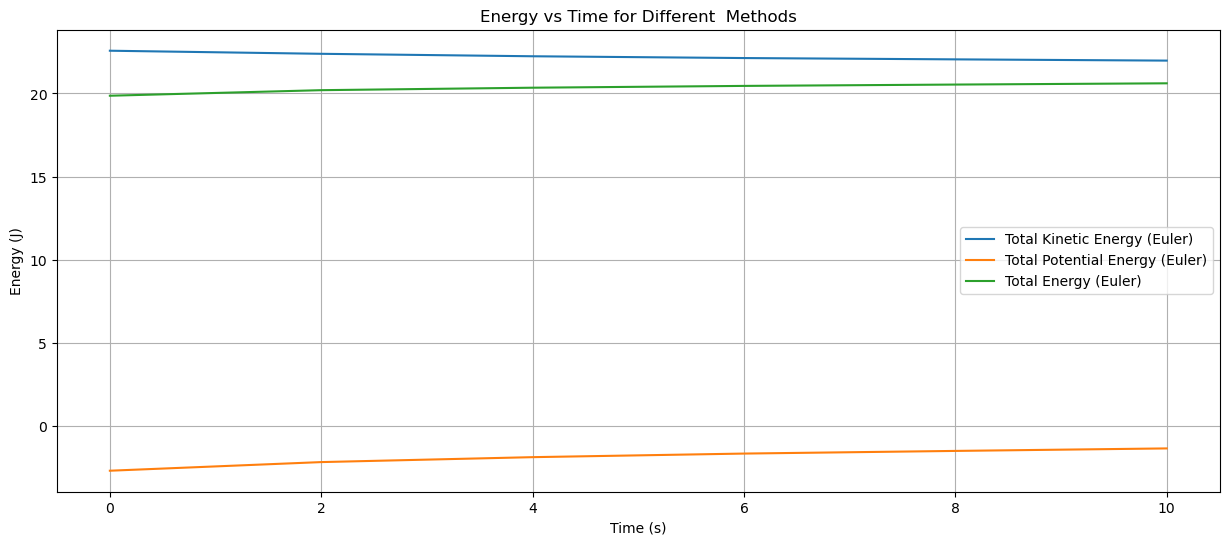

n= 0 Time:  0.0  dt:  0.01
n= 200 Time:  2.0000000000000013  dt:  0.01
n= 400 Time:  3.9999999999999587  dt:  0.01
n= 600 Time:  5.9999999999999165  dt:  0.01
n= 800 Time:  7.999999999999874  dt:  0.01
n= 1000 Time:  9.999999999999831  dt:  0.01
Simulation is done!


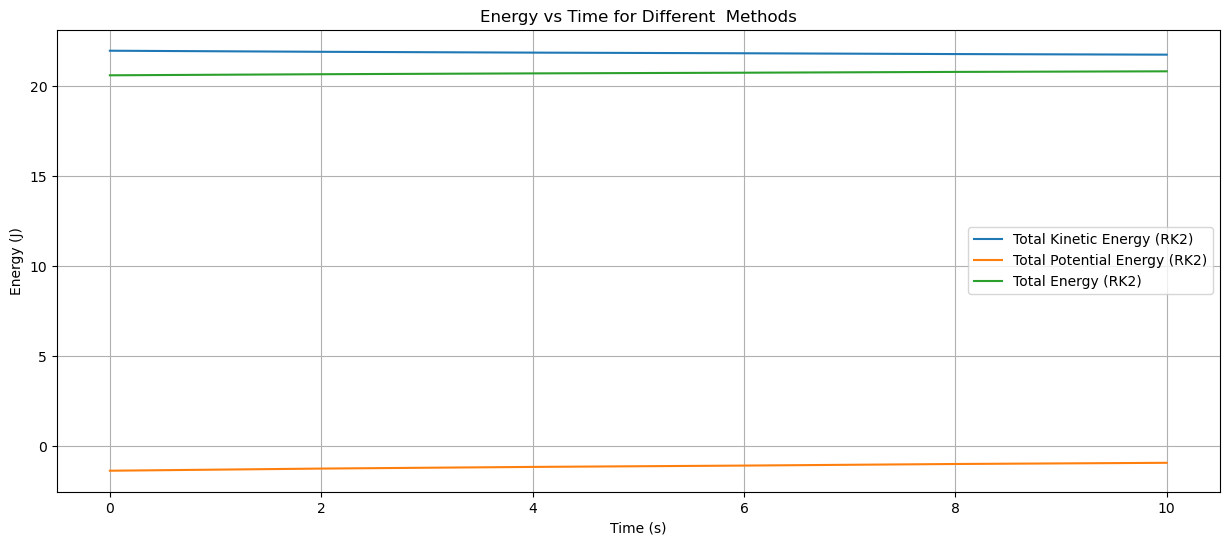

n= 0 Time:  0.0  dt:  0.01
n= 200 Time:  2.0000000000000013  dt:  0.01
n= 400 Time:  3.9999999999999587  dt:  0.01
n= 600 Time:  5.9999999999999165  dt:  0.01
n= 800 Time:  7.999999999999874  dt:  0.01
n= 1000 Time:  9.999999999999831  dt:  0.01
Simulation is done!


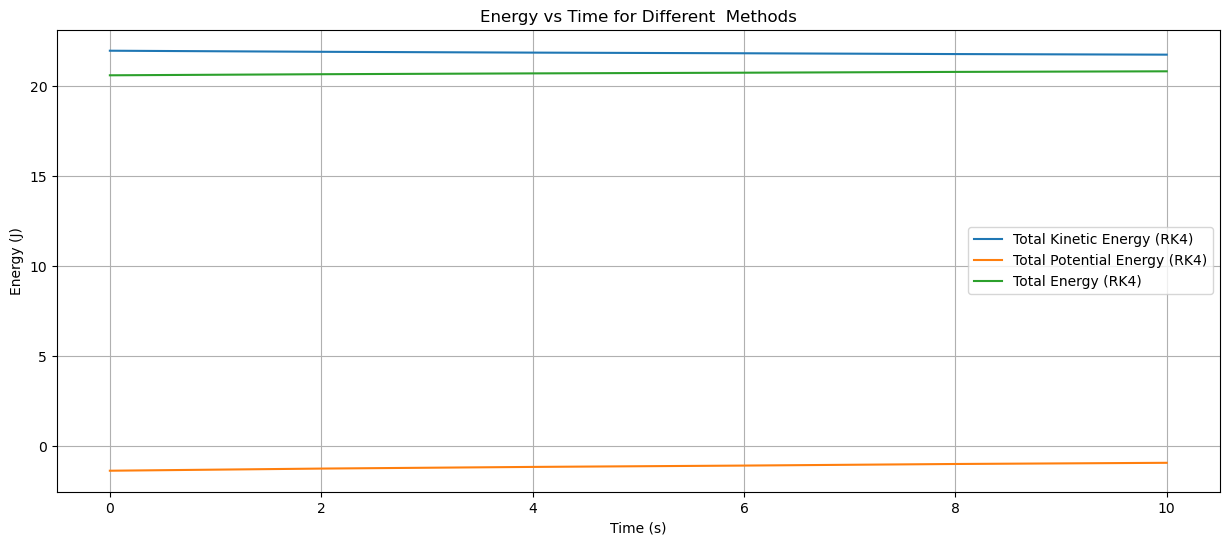

n= 0 Time:  0.0  dt:  0.01
n= 200 Time:  2.0000000000000013  dt:  0.01
n= 400 Time:  3.9999999999999587  dt:  0.01
n= 600 Time:  5.9999999999999165  dt:  0.01
n= 800 Time:  7.999999999999874  dt:  0.01
n= 1000 Time:  9.999999999999831  dt:  0.01
Simulation is done!


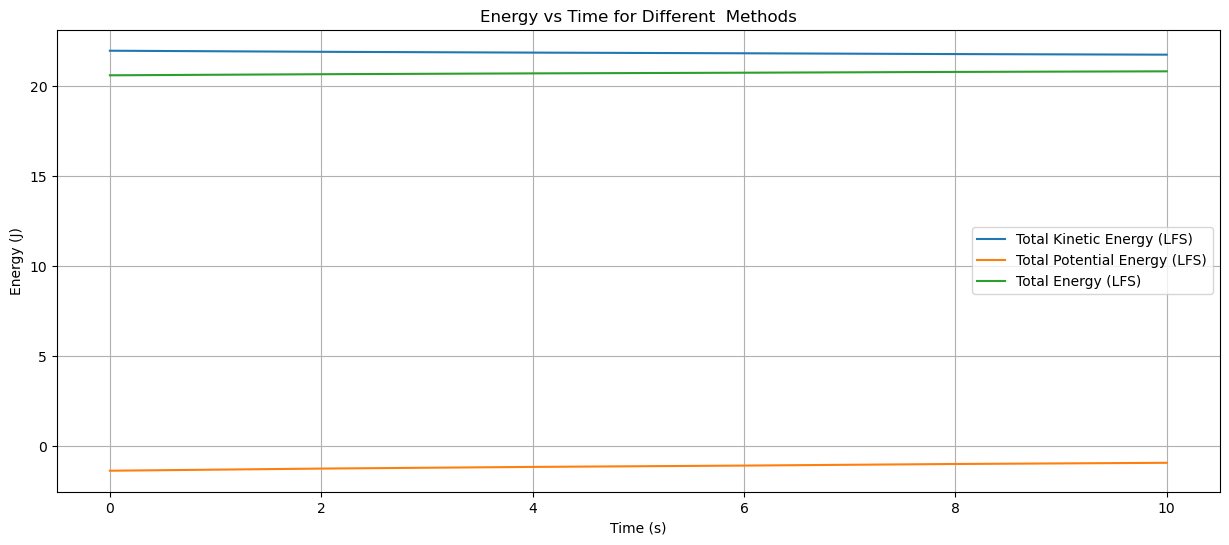

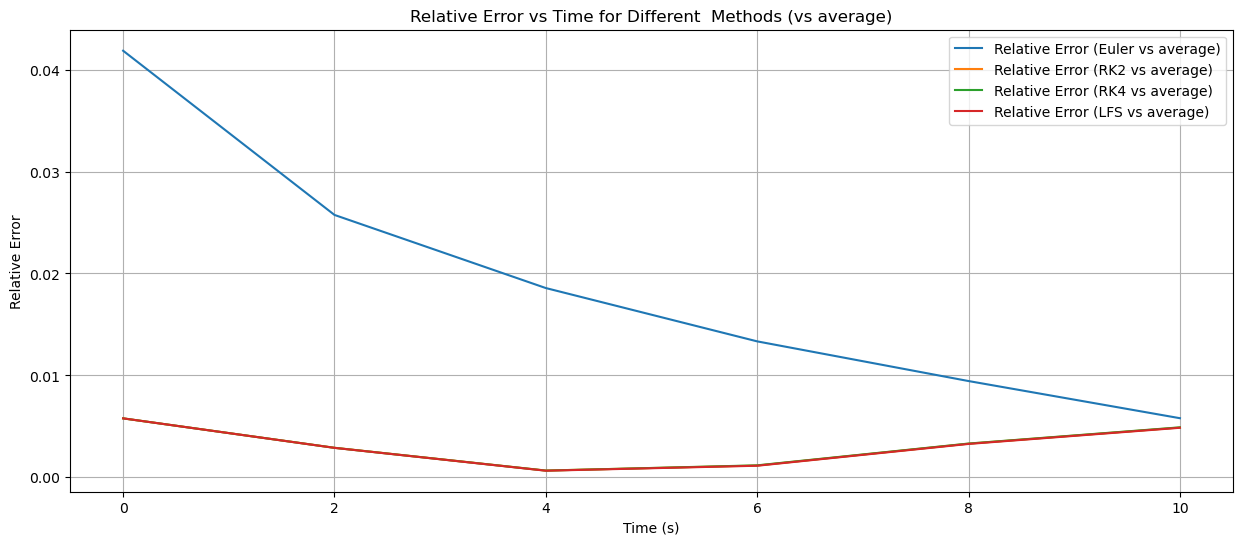

In [7]:
# 設置數值積分方法和時間步長
methods = ['Euler', 'RK2', 'RK4', 'LFS']
dt = 0.01
tmax = 10 + dt  # #我tmax加一個dt是因為我發現我如果直接跑10的話最後10秒的圖的n不知道為什麼會改變，所以我加dt

# 初始化存儲能量變化的列表
total_EKs = {method: [] for method in methods}
total_Us = {method: [] for method in methods}
total_energy = {method: [] for method in methods}
relative_errors = {method: [] for method in methods}

# 循循環模擬四種方法
for method in methods:
    # 重置初始条件
    particles.positions = positions
    particles.velocities = velocities
    particles.accelerations = accelerations
    particles.masses = masses
    particles.tags = tags

    # 執行模擬
    simulation.setup(G=0.1, rsoft=0.01, method=method, io_freq=200)
    simulation.evolve(dt=dt, tmax=tmax)

    # 讀取資料繪圖
    file_paths = load_files('nbody')
    times = []
    for file_path in file_paths:
        data = np.loadtxt(file_path)
        EK = data[11, :]
        U = data[12, :]
        total_EK = np.sum(EK)
        total_EKs[method].append(total_EK)
        total_U = np.sum(U)
        total_Us[method].append(total_U)
        total_energy[method].append(total_EK + total_U)
        times.append(int(file_path.split('_')[-1].split('.')[0]) / 100)  # extract time from file name
     # 繪製能量隨時間的變化圖表
    plt.figure(figsize=(15, 6))
    plt.plot(times, total_EKs[method], label=f'Total Kinetic Energy ({method})')
    plt.plot(times, total_Us[method], label=f'Total Potential Energy ({method})')
    plt.plot(times, total_energy[method], label=f'Total Energy ({method})')
    plt.xlabel('Time (s)')
    plt.ylabel('Energy (J)')
    plt.title('Energy vs Time for Different  Methods')
    plt.legend()
    plt.grid(True)
    plt.show()#如果需要疊圖只需要將plt.show()移出迴圈，這樣就可以畫出有12條線的一張圖
# 計算相對誤差
average=np.array(np.mean(total_energy['RK2']+total_energy['RK4']+total_energy['LFS']))#因為我們沒有准確值做參考，所以我另rk2、rk4、lfs的平均當參考值
for method in methods:
    relative_error = np.abs(np.array(total_energy[method]) - np.array(average)) / np.array(average)
    relative_errors[method] = relative_error
# 繪製相對誤差隨時間的變化圖表
plt.figure(figsize=(15, 6))
for method in methods:
    plt.plot(times, relative_errors[method], label=f'Relative Error ({method} vs average)')

plt.xlabel('Time (s)')
plt.ylabel('Relative Error')
plt.title('Relative Error vs Time for Different  Methods (vs average)')
plt.legend()
plt.grid(True)
plt.show()


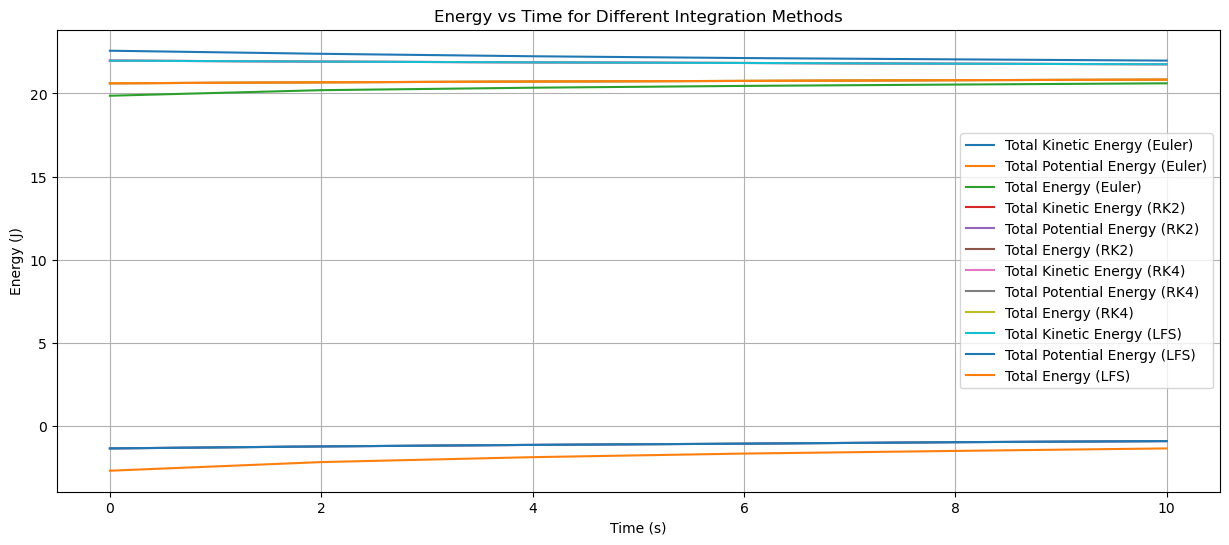

In [8]:
# 將不同方法的能量隨時間的變化圖疊圖
plt.figure(figsize=(15, 6))
for method in methods:
    plt.plot(times, total_EKs[method], label=f'Total Kinetic Energy ({method})')
    plt.plot(times, total_Us[method], label=f'Total Potential Energy ({method})')
    plt.plot(times, total_energy[method], label=f'Total Energy ({method})')

plt.xlabel('Time (s)')
plt.ylabel('Energy (J)')
plt.title('Energy vs Time for Different Integration Methods')
plt.legend()
plt.grid(True)
plt.show()

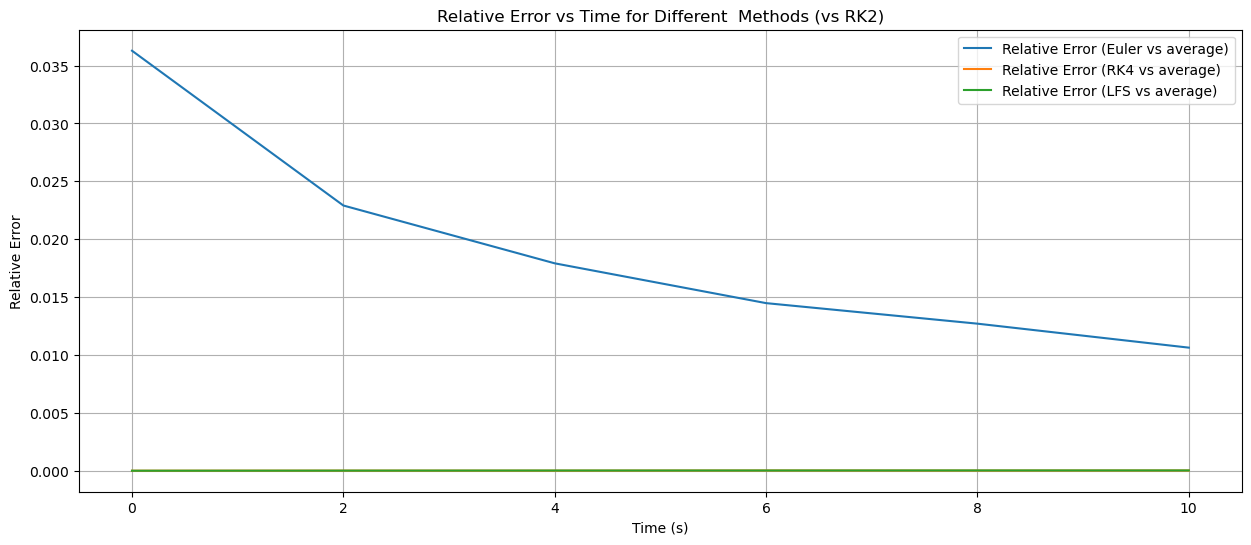

In [9]:
# 計算相對誤差
for method in methods:
    if method != 'RK2':
        relative_error = np.abs(np.array(total_energy[method]) - np.array(total_energy['RK2'])) / np.array(total_energy['RK2'])
        relative_errors[method] = relative_error
# 繪製相對誤差隨時間的變化圖表
plt.figure(figsize=(15, 6))
for method in methods:
    if method != 'RK2':
        plt.plot(times, relative_errors[method], label=f'Relative Error ({method} vs average)')

plt.xlabel('Time (s)')
plt.ylabel('Relative Error')
plt.title('Relative Error vs Time for Different  Methods (vs RK2)')
plt.legend()
plt.grid(True)
plt.show()
